Example with extensions from 

https://machinelearningmastery.com/clustering-algorithms-with-python/

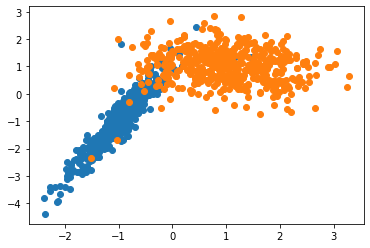

In [37]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=6)
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = where(y == class_value)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

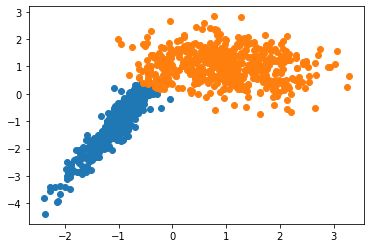

In [38]:
# k-means clustering
from numpy import unique
from sklearn.cluster import KMeans
# define dataset# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

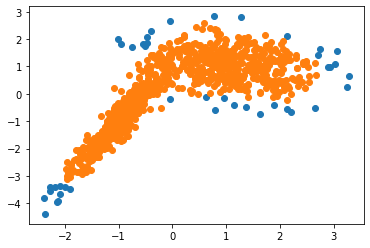

In [39]:
from sklearn.cluster import DBSCAN
# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

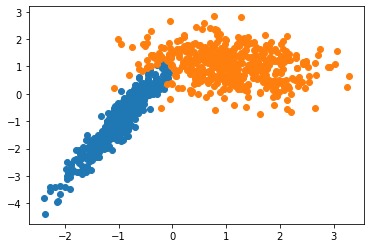

In [40]:
from sklearn.mixture import GaussianMixture
# define the model
model = GaussianMixture(n_components=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [41]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=16, n_informative=16, 
                           n_redundant=0, n_classes = 10, n_clusters_per_class=1, class_sep=2.0, random_state=6)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 12)
X_tsne = tsne.fit_transform(X_scaled)

Text(0, 0.5, 't-SNE feature 1')

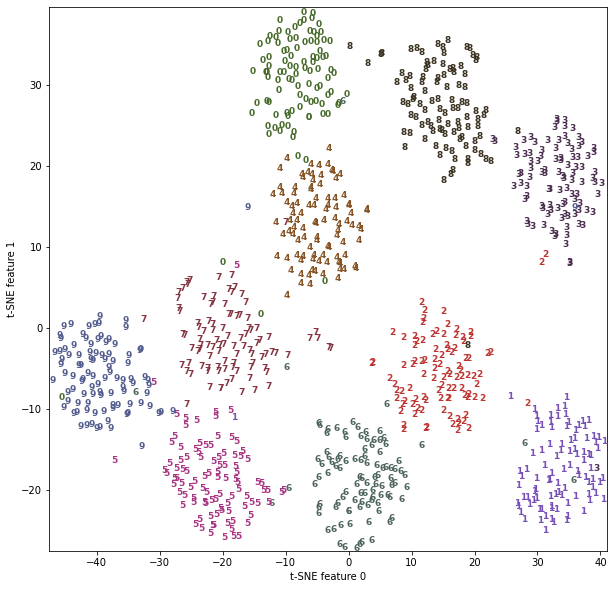

In [42]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
pyplot.figure(figsize=(10, 10))
pyplot.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
pyplot.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
for i in range(len(X_tsne)):
    # actually plot the digits as text instead of using scatter
    pyplot.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]),
             color = colors[y[i]],
             fontdict={'weight': 'bold', 'size': 9})
pyplot.xlabel("t-SNE feature 0")
pyplot.ylabel("t-SNE feature 1")

Text(0, 0.5, 't-SNE feature 1')

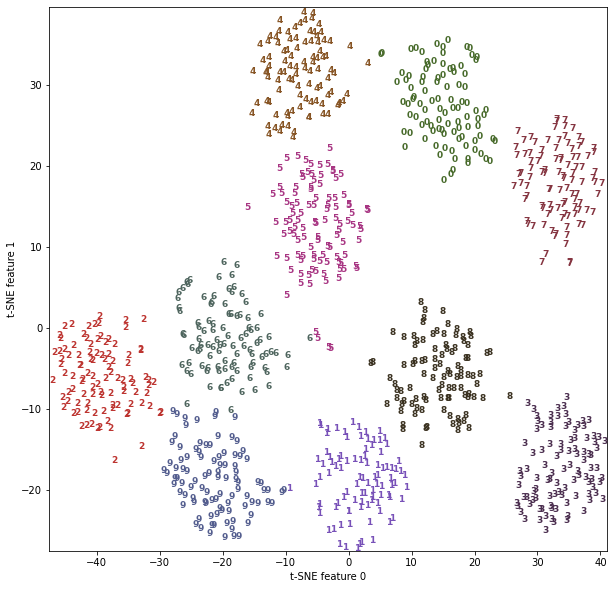

In [43]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(X_tsne)

pyplot.figure(figsize=(10, 10))
pyplot.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
pyplot.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
for i in range(len(X_tsne)):
    # actually plot the digits as text instead of using scatter
    pyplot.text(X_tsne[i, 0], X_tsne[i, 1], str(kmeans.labels_[i]),
             color = colors[kmeans.labels_[i]],
             fontdict={'weight': 'bold', 'size': 9})
pyplot.xlabel("t-SNE feature 0")
pyplot.ylabel("t-SNE feature 1")